In [72]:
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sb
import scipy
from scipy import stats

# Defining some initializers

In [73]:
N_c=100  #NUMBER OF CONFIGURATION
N=600 #NUMBER OF WALKERS in each configuration there are 600 R
D = (197.3269804)**2/2/939.56542052 
tau=0.001
sigma=math.sqrt(2*D*tau)
h = 0.00001
step=0.6
A=4
E0=-26 #MeV  '-28'funziona bene, '-27' non lo so

In [74]:
BestPars = [0.08597 , -0.7191 , 2.13796 ]  #sono gamma, a e beta!!
Bestpar = np.array(BestPars)

#Pars = [0.2, -0.2, 1] #Questi cosa sono? come mai vengono usati nella WF al posto di gamma, a e beta? 
#Par = np.array(Pars)

#Par_new = np.zeros(3)

In [75]:
# Generation of the Position Matrix

#Why this form?
R = (np.random.rand(3,A)-0.5)*10*step # Coordinates Matrix (number from -3 to 3)
print(R)
print(R[0,0])
print(R[1,0])
#print(WF2(R,Par,1))

[[ 0.79778663  1.81016769 -1.16847249  0.96542173]
 [ 2.58596965 -0.83907199  0.27775932  0.11946037]
 [-1.27347135  0.87918815 -2.36333186  0.75053539]]
0.7977866269578131
2.585969651054732


# Defining some functions for the computation

In [76]:
def Diff (R, i, j, h, Par):
  R_P = R.copy()
  R_M = R.copy()
  R_P[i,j] = R[i,j]+h
  R_M[i,j] = R[i,j]-h
  return (WF(R_P, Par)+WF(R_M, Par)-2*WF(R, Par))/h**2 

In [77]:
def V(R):
  V = 0
  for i in range(0,A-1):
    for j in range(i+1,A):
      V = V + 1000*math.exp(-3*d(R,i,j))-165.35*math.exp(-1.05*d(R,i,j))-21.5*math.exp(-0.6*d(R,i,j))-83*math.exp(-0.8*d(R,i,j))-11.5*math.exp(-0.4*d(R,i,j))
  return V
#print(V(R))

In [78]:
def K(R, Par):
  K = 0 
  for j in range(0,A):
    for i in range(0,3):
      K = K + Diff(R, i, j, h, Par )*D
  return K
#print(K(R,Par))

In [79]:
#,mai usato

#modificalo, devi fare vettore per vettore, quindi fare un ciclo for fino a 4 e aggironare
def diffuse(R,D,tau):
    Rnew = R + gaussrand()*math.sqrt(2*D*tau)
    return(Rnew)
#D*tau*driftF(Grad,i,j,h,WF,R,Par) was present, but I don't know how to add it

In [80]:
#sarebbe 'eta'
def gaussrand():
    rand= np.random.normal(0,sigma,3)
    return(rand)

In [81]:
# Definition of a distance funtion

def d(R,i,j):
  d = (R[0,i]-R[0,j])**2 + (R[1,i]-R[1,j])**2 +(R[2,i]-R[2,j])**2
  return d
print(d(R,1,1))

0.0


In [82]:
def WF(R, Par):
  wf = 1
  for i in range(0,A-1):
    for j in range(i+1,A):
      wf = wf * (math.exp(-Par[0]*d(R,i,j))+Par[1]*math.exp(-Par[2]*d(R,i,j)))
  #print("Eigenfunction value is = ", wf)     
  return wf 

In [83]:
#Mai chiamata

def WF2(R, Par,numeronucleone):
  wf = 1
  for i in range(3):
        wf = wf * (math.exp(-Par[0]*d(R,i,numeronucleone))+Par[1]*math.exp(-Par[2]*d(R,i,numeronucleone)))
        print(i)
        print(wf)
  #print("Eigenfunction value is = ", wf)     
  return wf 
#corretta forse,
#Moltiploica le wf solo per un singolo nucleone, x,y,z, ma non era quello che volevo!!!

In [84]:
def wf(R,i,numeronucleone):
    wfan=(math.exp(-Bestpar[0]*d(R,i,numeronucleone))+Bestpar[1]*math.exp(-Bestpar[2]*d(R,i,numeronucleone)))
    return wfan
print(wf(R,2,2))
print(wf(R,1,1))

0.28090000000000004
0.28090000000000004


In [114]:


#GRADIENTE DELLA TRIAL FUNCTION
def drifunction(R):
    list_F=[]
    def Fall(R):
        for i in range(3):
            for numeronucleone in range(A):
                R_P = R.copy()
                R_M = R.copy()
                R_P[i,numeronucleone] = R[i,numeronucleone]+h
                R_M[i,numeronucleone] = R[i,numeronucleone]-h
            
                list_F.append((wf(R_P,i,numeronucleone)-wf(R_M,i,numeronucleone))/wf(R,i,numeronucleone))
            #print(wf(R,i,numeronucleone))
    #f=np.reshape(list_F, (3, 4))
    #print(f)
        return(list_F)

    Fall(R)
#print(list_F)
    f=np.reshape(list_F,(3,4))
    #print(f)
    return(f)
#print(f)
#NON VA BENE PERCHè QUELLI CON LO STESSO INDICE (O,O) (1,1) (2,2) HANNO VARIAZIONE NULLA, MA 
#FACCIAMO FINTA CHE VADA BENE, ANDIAMO AVANTI

In [115]:
listona=[]
listona.append((np.random.rand(3,A)-0.5)*step)
print(listona[0][1,2])

0.159870261914502


In [131]:
def greenfunction(R,Rnew,fun,Et):
    expo=1
    for i in range(3):
        for j in range(A):
            expo=expo* math.exp((-1)*((R[i,j]-Rnew[i,j]-D*tau*fun[i,j])**2)/4*D*tau)
            
    expo2=expo*math.exp(tau*(Elocale(R,Bestpar)-Et))*(4*math.pi*tau*D)**(3/2)
    return(expo2)

In [127]:


#i I HAVE DONE THIS BECAUSE WAS ASKED BY THE PDF OF RICCARDO (1/1) REFERS TO THE RATIO BETWEEN GREEN FUNCTIONS
#ORA QUI AL POSTO DI R GLI PASSERØ 'waal[0]' che è la R iniziale della configurazione corrente
def rattio(R,Rnew,fun,Et):
    first=greenfunction(R,Rnew,fun,Et)
    second=greenfunction(Rnew,R,fun,Et)
    rat=((WF(Rnew,Bestpar))**2/(WF(R,Bestpar))**2)*((first)/(second))
    return(rat)

#WHAT TO DO WITH THE GREEN FUNTIONS????
#THEN YOU HAVE TO DO THE METROPOLIS QUESTION

In [118]:
#questa comunque è corrett
#È indipendente dal richiamare R per ogni configurazione

def Elocale(R,Bestpars):
    Eloc= (V(R) - K(R,Bestpar)/WF(R,Bestpar))
    return(Eloc)

In [119]:
#non è mai chiamata

#NOW I AM GOING TO FOLLOW THE GUARDIOLA PDF
def replication_factor(Rnewest):
    factor=np.exp(-tau*((Elocale(R,Bestpar)/2)+(Elocale(Rnewest,Bestpar)/2)-E0))
    fact=math.floor(factor + np.random.rand())
    return(fact)
#IN TEH PDF OF RICCARDO INSERT ALSO A RANDOM NUMBER IN THE PARTE INTERA, MA NON HA IN CONFRONTO CON ELOCALE(R')
#NEL FILE INVECE METTE UN -TAU E COMUNQUE INSERISCE UN NUMERO RANDOM IN 'FACT'

In [120]:
#non è mai chiamata

def P_b(Rnewest):
    prob=np.exp(-tau*((Elocale(R,Bestpar)/2)+(Elocale(Rnewest,Bestpar)/2)-E0))
    return(prob)

In [121]:
print(R)
configuration()
print(R)

[[ 0.1444361   0.18077563 -0.16323397  0.21166247]
 [-0.16854322 -0.04668974 -0.11731996  0.29326606]
 [-0.19570233 -0.2171066  -0.17437006 -0.00736849]]
[[ 0.1444361   0.18077563 -0.16323397  0.21166247]
 [-0.16854322 -0.04668974 -0.11731996  0.29326606]
 [-0.19570233 -0.2171066  -0.17437006 -0.00736849]]


In [122]:
def prova(R):
    R = (np.random.rand(3,A)-0.5)*step
    return(R)


In [123]:
R=prova(R)
print(R)

[[ 0.0257988   0.19853925  0.23972655  0.09214708]
 [-0.29454392  0.1625622  -0.20833315  0.09006756]
 [-0.15088913  0.05511825 -0.14985224 -0.2672332 ]]


In [124]:
#QUESTA FUNZIONE CONSENTE DI MANTENERE LA PRIMA R FISSATA E NON AGGIORNARLA TUTTE LE VOLTE
def configuration():
    #QUI ORA RICHIAMO LA CREAZIONE DI R OGNI VOLTA, PERCHÈ HO VISTO CHE IL VALORE CALCOLATO DI ENERGIA
    #MEDIA DIPENDE MOLTO DALLA CONFIGURAZIONE INIZIALE, QUINDI PROVANDO A MEDIARE ANCHE SU QUELLE
    #POSSO PROVARE AD AVERE UN VALORE PIU SIMILE OGNI VOLTA
    
    R = (np.random.rand(3,A)-0.5)*step # Coordinates Matrix (number from -3 to 3)  HO TOLTO IL *10
    #print(R)
    
    list_R = []
    list_R.append(R)
    E_ltotal=0
    E_lacc=0
    NA=0
    NIC=0
    for k in range(0,1200):
        R_new = R.copy() + step*(np.random.rand(3,A)-0.5)
        if ((WF(R_new, Bestpar)/WF(R, Bestpar))**2>1 or (WF(R_new, Bestpar)/WF(R, Bestpar))**2 > np.random.rand() ):
            R = R_new.copy()
            list_R.append(R)
            NA = NA +1
            E_lacc=E_lacc + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
        #else:              # MI SA CHE VA LEVATO QUESTO ELSE
            #R = R.copy()
            #list_R.append(R)
        NIC=NIC+1
        E_ltotal=E_ltotal + V(R) - (K(R,Bestpar)/WF(R,Bestpar))
    return(list_R)

# Diffusion Monte Carlo Model

In [132]:
#TRE

#HO COPIATO QUELLO SOPRA PER MODIFICARLO SENZA PERDERLO.
#--------------------
#QUI PENSO CHE CHIAMERò L'ALGORITMO DI CREAZIONE DELLA list_R AD OGNI CICLO*********fatto
#IN PIÙ COPIERò LE CONFIGURAZIONI PROPORZIONALMENTE AL REPLICATION INDEX
#in più terrò aggiornata la trial energy ogni ciclo
#***************************************************************************************
#LHO RICOPIATO ANCORA
#--------------------
#PRIMA list_energytot non veniva rinizializzata ad ogni configurazione, ma veniva solamente allungata. CAMBIERØ QUESTO
#LA CHIAMERò 'list_Energyconfiguration'
#----aggiustato

#REGISTRA LE ENERGIE AL QUADRATO!!!! 
#----fatto

#ORA QUESTO CODICE RICHIAMA AD OGNI CONFIGURAZIONE UNA DISTRIBUZIONE INIZIALE NUOVA, NON VI È PIÙ UNA FISSA
#----fatto

#HO NOTATO PERò CHE TUTTE LE FUNZIONI TIPO 'ratio, Elocale ecc..' sono basate su R iniziale, ma dato che viene
#richiamata ogni volta questa cosa non va bene..
#-----aggiustato



list_Energytot=[]
list_floor=[] #USED TO SEE THE VALUES OF THE 'floor'
list_sigma=[]
list_energysquaredtot=[]
list_energybariablevalue=[]  #list of the energy of the cicle before that are used as a reference for computation of Pb
list_energybariablevalue.append(E0)    
list_Energytotwheighted=[]  #list of the energy wheighted in base of Pb
list_position=[]
finallist_R=[]
#numbofwalkers=len(list_R) ----->    LO METTO DENTRO AL CICLO DELLE CONFIGURATION DATO CHE CREERò DELLE CONFIGURAZIONI NUOVE AD OGNI CICLO E LA LUNGHEZZA POTREBBE VARIARE
nucleons=A
for config in range(100):
    list_Energyconfiguration=[] #VIENE RIEMPITA AD OGNI CICLO DI CONFIGURAZIONI DAL CILO FOR SOTTOSTANTE, PASSERà POI AD UNA LISTA IL VALORE DELL'ENERGIA MEDIA PER OGNI CONFIGURAZIONE.
    list_SquaredEnergyconfiguration=[]
    waal=configuration()  #-----QUI C'ERA UNA R DENTRO PARENTESI    #CREO UNA CONFIGURAZIONE DI 800 CIRCA MATRICI R OGNUNA CON UNO STEP IN PIU, CHIARAMENTE ACCETTANDO O MENO CON IL METROPOLIS-HASTING ALGORITM (sarebbe list_R di fatto, la la creo 100 volte, 100 configurazioni)
    numbofwalkers=len(waal)   #NUMBOFWALKERS SAREBBE IL NUMERO DI MATRCI CHE LA CONFIGURAZIONE CORRENTE POSSIEDE
    for walker in range(numbofwalkers):     #CICLO NELLE VARIE MATRCICI POSIZIONE DELLA CONFIGURAZIONE CORRENTE
            P=np.zeros((3,4))       #CREO UNA MATRICE DI ZERI 3x4
            fun=drifunction(waal[walker])  #CALCOLO LA DRIFT FUNCTION(GRADIENTE) PER LA MATRICE CORRENTE(waal[walker])
            for nucleon in range(A):       #ciclo su tutti i nucleoni nella matrice corrente(4) e applico un altro shift con la drift function e una gaussiana
                P[:,nucleon]=waal[walker][:,nucleon] + D*tau*fun[:,nucleon] + math.sqrt(2*D*tau)*gaussrand()
                
            #list_R[walker]
            #for nucl in range(nucleons):  #nucleon=4=A   questo ciclo for non serve a una sega, è gia dentro a shifting il ciclo sui nucleoni
            
            #HO COMMENTATO 'P=shifting(walker)' PERCHÈ LA FUNZIONE SHIFTING HA ALL'INTERNO LIST_R, MA DOVENDO AGGIORNARLA AD OGNI 
            #CONFIGURAZIONE L'HO MESSA DENTRO UNA FUNZIONE E NON è UNA VARIABILE LOCALE, MA ESISTE SOLO DENTRO ALLA 'configuration'
            #PERTANTO ESTRAGGO IL SUCCO DELLA FUNZIONE SHIFTING E LO AGGIORNO QUI DENTRO 
            #P=shifting(walker)  #RESTITUSCE LA MATRICE DOPO LO SHIFTING R'=R + ...
            
            rat=rattio(waal[0],P,fun,E0)      #RESTITUISCE IL RAPPORTO TRA I MUDULI QUADRI DELLE TRIAL FUNCTIONS valutate in R' e R
            
                #Metropolis question?? VALUTO SE LO SHIFTING CALCOLATO È ACCETTABILE
            if(rat>1 or rat> np.random.rand()):
                #accetta lo spostamento
                finallist_R.append(P)   #REGISTRO LA NUOVA MATRICE SHIFTATA
                energy = Elocale(P,Bestpar)
                list_Energytot.append(energy)   #registra TUTTE le enrgie di ogni passo
                list_Energyconfiguration.append(energy) #registra le energie di ogni passo, ma si rinizializza ad ogni configurazione, infatti contine solo le enrgie locali delle matrici della configurazione corrente, servirà a passare i valori medi delle enrgie delle configurazioni ad ogni ciclo
                list_SquaredEnergyconfiguration.append(energy**2)
                
                    #errore
                    #PENSAVO ANDASSE CALCOLATO AD OGNI SHIFTING, IN RELTà INVECE SOLO NELLE SINGOLE CONFIGURAZIONI, QUINDI VA FUORI DA QUESTO CICLO
    #                n=replication_factor(P)  #CALCOLO IL REPLICATION FACTOR E SOTTO SOMMO LE ENERGIE IN BASE A 'n'
    #                for i in range(n):
    #                    list_Energytot.append(Elocale(shifting(walker),Bestpar))

    #for walker in range(numbofwalkers):  no!!
    
    #HO COMMENTATO QUELLA SOTTO PERCHÈ VOGLIO PROVARE QUESTA QUI SENZA L'ENERGIA LOCALE DI R INIZIALE, E HO ANCHE NOTATO CHE Pb ERA STATO SCRITTO MALE, VABEH, POCO CONTO
    Pb=math.exp(-(tau)*(((sum(list_Energyconfiguration)/len(list_Energyconfiguration)))-list_energybariablevalue[config]))  #era sbagliata la formula fino a bello43 perche tau deve moltiplicare tuttooooo!
    
    #Pb=math.exp(-(tau)*((1/2)*((sum(list_Energyconfiguration)/len(list_Energyconfiguration))+Elocale(R,Bestpar)))-list_energybariablevalue[config])    # QUANDO GIRI SU UNA SOLA CONFIG RICORDATI DI CAMBIERE 'configuration' con '0'.
    #Perchè il primo termine di list_energybariablevalue è E0, quindi se l'indice di ista è aggiornato a quello locale è come se stesse girando al valore precedente dato che lo zeresimo elemento è E0
    
    
    floor=math.floor(Pb + np.random.rand())  #approssima all'intero più vicino
    list_floor.append(floor)
    
    for i in range(floor):
        #-----MAKE 'FLOOR' COPIES OF THE CONFIGURATION. 
        #WHAT IS A COPIE OF THE CONFIGURATION EXACLTLY?? 
    
        list_Energytotwheighted.append((sum(list_Energyconfiguration)/len(list_Energyconfiguration))*Pb)  #APPENDE L'ENERGI ALOCALE DELLA CONFIGURAZIONE PESATA SU Pb
    
        meanenergy= sum(list_Energyconfiguration)/len(list_Energyconfiguration)
        list_energybariablevalue.append(meanenergy)
    
        meansquaredenergyconfiguration=sum(list_SquaredEnergyconfiguration)/len(list_SquaredEnergyconfiguration)
        list_energysquaredtot.append(meansquaredenergyconfiguration)
    
        sig = math.sqrt( ( (meansquaredenergyconfiguration) - ( (meanenergy)**2) )/len(list_Energyconfiguration))
        list_sigma.append(sig)
    
    print("configuration number ", config , "\n  The mean energy value is: ", meanenergy, " +- ", sig)
    
#final=sum(list_Energytot)/(100*numbofwalkers)
#PRIMA DI FARE ALCUNI CAMBIAMENTI MI CI AVEVA MESSO UNA VITA

configuration number  0 
  The mean energy value is:  -32.37128948148884  +-  1.9717107647676224
configuration number  1 
  The mean energy value is:  -28.426956764750933  +-  1.3561990263010382
configuration number  2 
  The mean energy value is:  -23.769729673982415  +-  1.0602269070322576
configuration number  3 
  The mean energy value is:  -25.61948577063133  +-  1.5395656986137969
configuration number  4 
  The mean energy value is:  -23.082717049811322  +-  1.3258614084733078
configuration number  5 
  The mean energy value is:  -28.87937031272053  +-  1.6433277544166809
configuration number  6 
  The mean energy value is:  -26.271928303248103  +-  1.4988776711033556
configuration number  7 
  The mean energy value is:  -27.07050616513956  +-  1.602717993875826
configuration number  8 
  The mean energy value is:  -21.882921135416872  +-  1.0208369116688172
configuration number  9 
  The mean energy value is:  -25.583753245725926  +-  2.299650246521792
configuration number  10 


configuration number  84 
  The mean energy value is:  -29.09282218935111  +-  1.7711045744774538
configuration number  85 
  The mean energy value is:  -29.002354642579494  +-  1.8871861835702735
configuration number  86 
  The mean energy value is:  -27.80790141468413  +-  1.7181745275852598
configuration number  87 
  The mean energy value is:  -27.19798024244578  +-  1.3903602985153143
configuration number  88 
  The mean energy value is:  -28.29237680336286  +-  1.9888975831222082
configuration number  89 
  The mean energy value is:  -25.624666425658358  +-  1.3119721309402315
configuration number  90 
  The mean energy value is:  -23.74037465850254  +-  1.1327784983371998
configuration number  91 
  The mean energy value is:  -27.77976648125055  +-  1.9497382350206105
configuration number  92 
  The mean energy value is:  -27.326242640882647  +-  1.2208963192377051
configuration number  93 
  The mean energy value is:  -37.37329333720628  +-  3.269540616925054
configuration numb

In [133]:
print(len(list_sigma))
print(len(list_energybariablevalue))
print(list_floor)

100
101
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [97]:
noo=0
dee=0

for i in range(0,len(list_sigma)):
    noo= noo + (list_energybariablevalue[i+1]*(list_sigma[i]))
    dee= dee + list_sigma[i]
    
fr=noo/dee
print(fr)

-27.04851071020498


In [134]:
#Media pesata
#list_energybariablevalue ha un 'i+1' perche comincia con E0 e devo saltarlo per avere allineamento
#tra energie medie e deviazioni standard

numerator=0
denominator=0

for i in range(0,len(list_sigma)):
    numerator= numerator + (list_energybariablevalue[i+1]/((list_sigma[i])**2))
    denominator=denominator + (1/((list_sigma[i])**2))
    
fraction=numerator/denominator
#print(fraction)

medpes=math.sqrt(1/denominator)
#print(medpes)
print("The mean of the mean energies of the total number of configuration value is: \n", fraction, " +- ", medpes)


#-----------
#dopo aver tolto il '*10' dall'R iniziale
#con E0=-26 la media delle energie caloclare faceva: -26.901466554986694  +-  13.391540886419971 bello55
#con E0=-26 la media delle energie caloclare faceva: -27.025561010258546  +-  13.263635694659163 bello57
#QUESTI SOPRA HANNO LA DEVIAZIONE STANDARD SBAGLIATA, NON AVEVO MESSO 1/DENOMINATORE SOTTO RADICE

#----------
#ora giro su 100 configuration e basta con 1200 walker
#con E0=-26 la media delle energie caloclare faceva: -27.406218999303338  +-  0.14611281050643157 bello59
#TROPPO BASSA QUESTA DEVIAZIONE STANDARD!!!!

#--------
#dopo aver aggiustato la R della funzione ratio
#con E0=-26 la media delle energie caloclare faceva: -26.108258881728457  +-  0.14475668051769278 bello61
#con E0=-26 la media delle energie caloclare faceva: -25.872643218466852  +-  0.14221831474534635

#-------
#DOPO AVER CAMBIATO RATIO INSERENDO LA GREENFUNCTION
#con E0=-26 la media delle energie caloclare faceva: -26.019877518982007  +-  0.1495385081668931

The mean of the mean energies of the total number of configuration value is: 
 -26.019877518982007  +-  0.1495385081668931


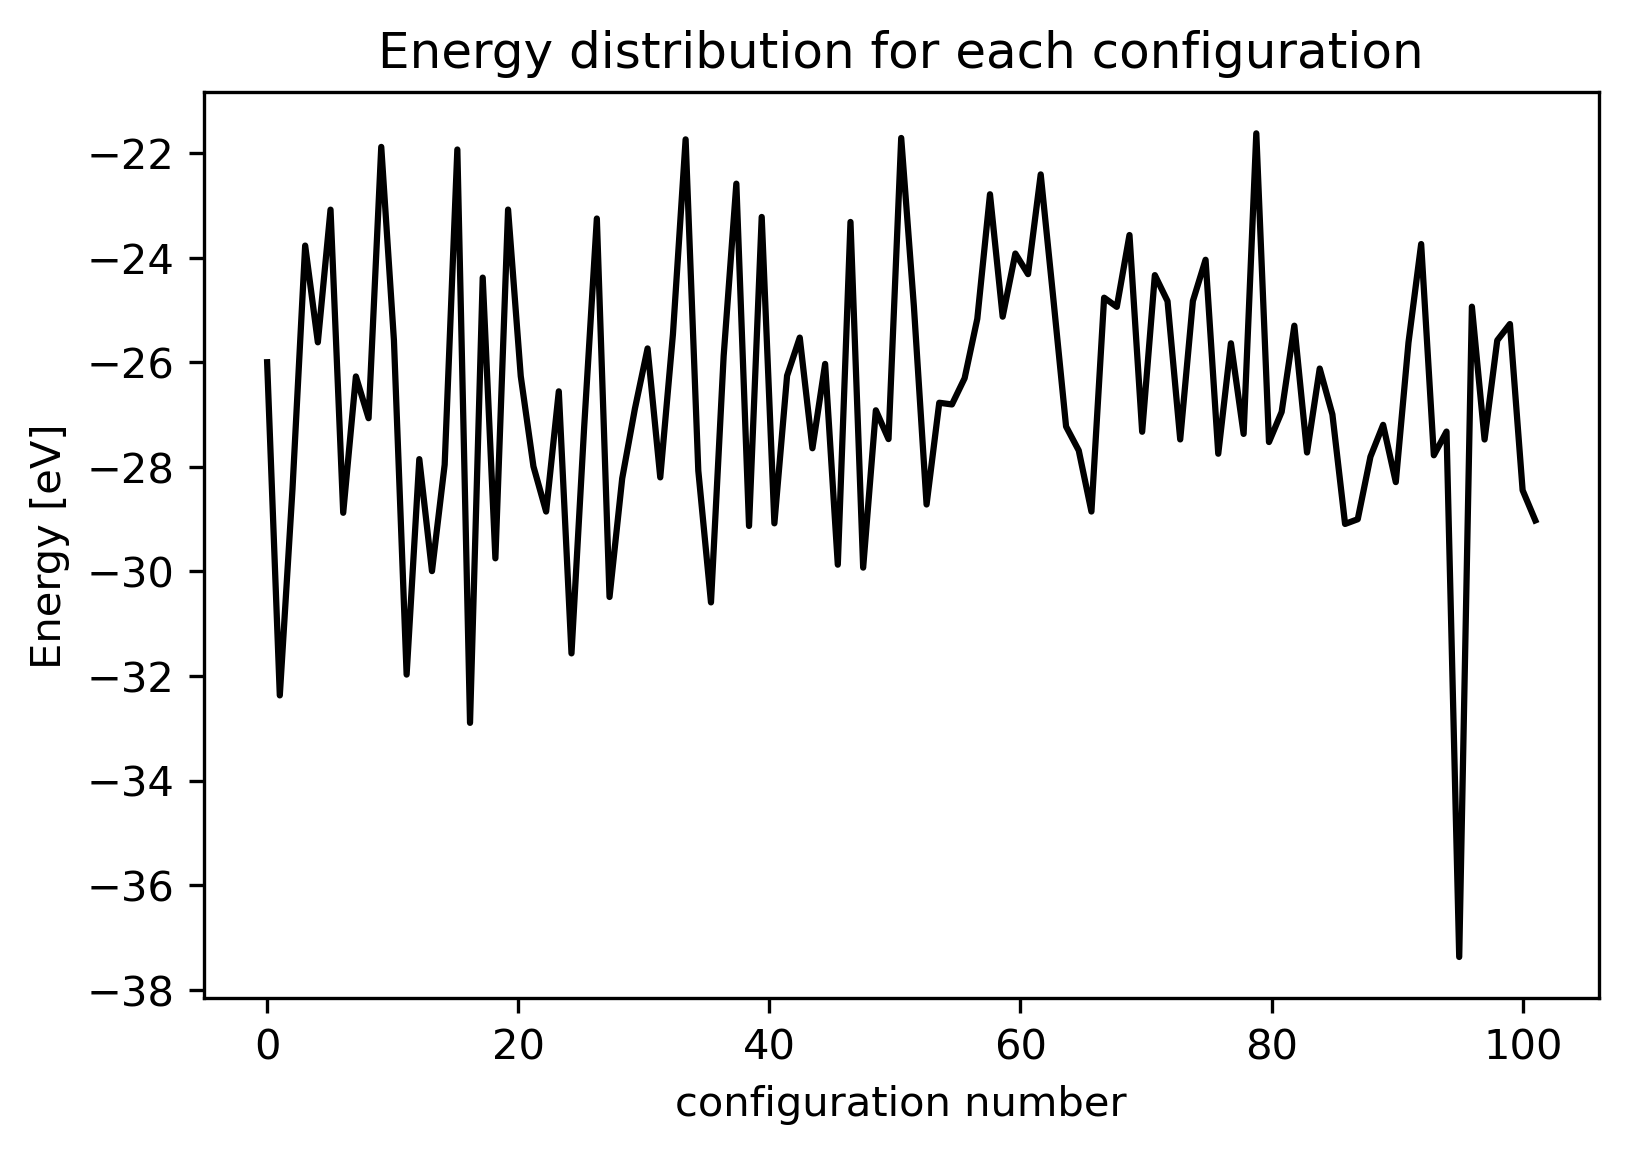

In [135]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_energybariablevalue),len(list_energybariablevalue))
ax.plot(ics,list_energybariablevalue, color='black')
ax.set_xlabel('configuration number')
ax.set_ylabel('Energy [eV]')
plt.title('Energy distribution for each configuration')
plt.show()
#print(len(ics))

In [136]:
print(sum(list_energybariablevalue)/len(list_energybariablevalue))
print(len(list_energybariablevalue))

#tutto con configuration=500 e la lista creata per ogni configurazione lunga 800,
#ma comunque con una selezione interna data dal metropolis-hasting question, quindi sono circa 600.

#con E0=-28 la media delle energie caloclare faceva:-25.272343045633058
#con E0=-25 la media delle energie calcolate faceva: -30.25544102949634  bello15
#con E0=-25 la media delle energie calcolate faceva: -30.311834856850584 bello19
#con E0=-28 la media delle energie caloclare faceva: -30.293387960335565 bello23
#con E0=-28 la media delle energie caloclare faceva: -29.689587507995018 bello24
#con E0=-28 la media delle energie caloclare faceva: -23.89977462821116 bello28


#con 100 configuration
#con E0=-28 la media delle energie caloclare faceva:-24.063567641908545 bello30

#cambiando R iniziale
##con E0=-28 la media delle energie caloclare faceva:-32.09945490538332 bello32
##con E0=-28 la media delle energie caloclare faceva: -32.578856752521766 bello33

#cambiando R iniziale
#con E0=-28 la media delle energie caloclare faceva: -32.3936018760646 bello34

#Cambiando R iniziale
#con E0=-28 la media delle energie caloclare faceva: -32.78948955328789 bello 35

#camnbiando R iniziale
#con E0=-28 la media delle energie caloclare faceva:-25.692054555808035 bello36
#con E0=-28 la media delle energie caloclare faceva:-26.291382430204457 bello37

#------------------------------------------
#ORA HO CAMBIATO LA FUNZIONE CONFIGURATION, HO INSERITO UN RINIZIALIZZATORE DI R INIZIALE
#OGNI VOLTA CHE VIENE CHIAMATA, PERCHÈ HO VISTO TROPPA DIPENDENZA DELL'ENERGIA MEDIA DALLO STATO INIZIALE 

#con E0=-28 la media delle energie caloclare faceva: -26.43119373720527 bello38
#con E0=-28 la media delle energie caloclare faceva: -26.12699651173654 bello40

#cambiato la lunghezza degli walker da 800 a 1200
#con E0=-28 la media delle energie caloclare faceva: -25.855653335970953 bello41
#con E0=-28 la media delle energie caloclare faceva: -25.84629111112277 bello 42
#con E0=-28 la media delle energie caloclare faceva: -26.95480750982787 bello 43


#cambio E0=-26 MeV
#con E0=-26 la media delle energie caloclare faceva: -26.839351046063438 bello44
#CAMBIATO Pb
#con E0=-26 la media delle energie caloclare faceva: -27.621327869824093 bello45
#con E0=-26 la media delle energie caloclare faceva: -25.35807999842165 bello47

#----------
#TORNO A 400 CONFIGURATIONS E 1200 WALKER PER CONFIGURATION
#con E0=-26 la media delle energie caloclare faceva: -25.78535781755975 bello49
#con E0=-26 la media delle energie caloclare faceva: -26.130171224513877 bello51
#con E0=-26 la media delle energie caloclare faceva: -25.82625770796333 bello53

#----------------
#HO CAMBIATO LA R INIZIALE, HO TOLTO IL '*10' E QUINDI ORA VA DA -0.3 A 0.3
#con E0=-26 la media delle energie caloclare faceva: -27.383130551674153 bello55
#con E0=-26 la media delle energie caloclare faceva: -27.541935006631512 bello57

#----------
#ora giro su 100 configuration e basta con 1200 walker
#con E0=-26 la media delle energie caloclare faceva: -27.57618564269124 bello59

#--------
#dopo aver aggiustato la R della funzione ratio
#con E0=-26 la media delle energie caloclare faceva: -26.710111267992485 bello61
#con E0=-26 la media delle energie caloclare faceva: -26.30403772953306

#---------
#dopo aver inserito la green function dentro a rattio
#con E0=-26 la media delle energie caloclare faceva: -26.628323305804724

-26.628323305804724
101


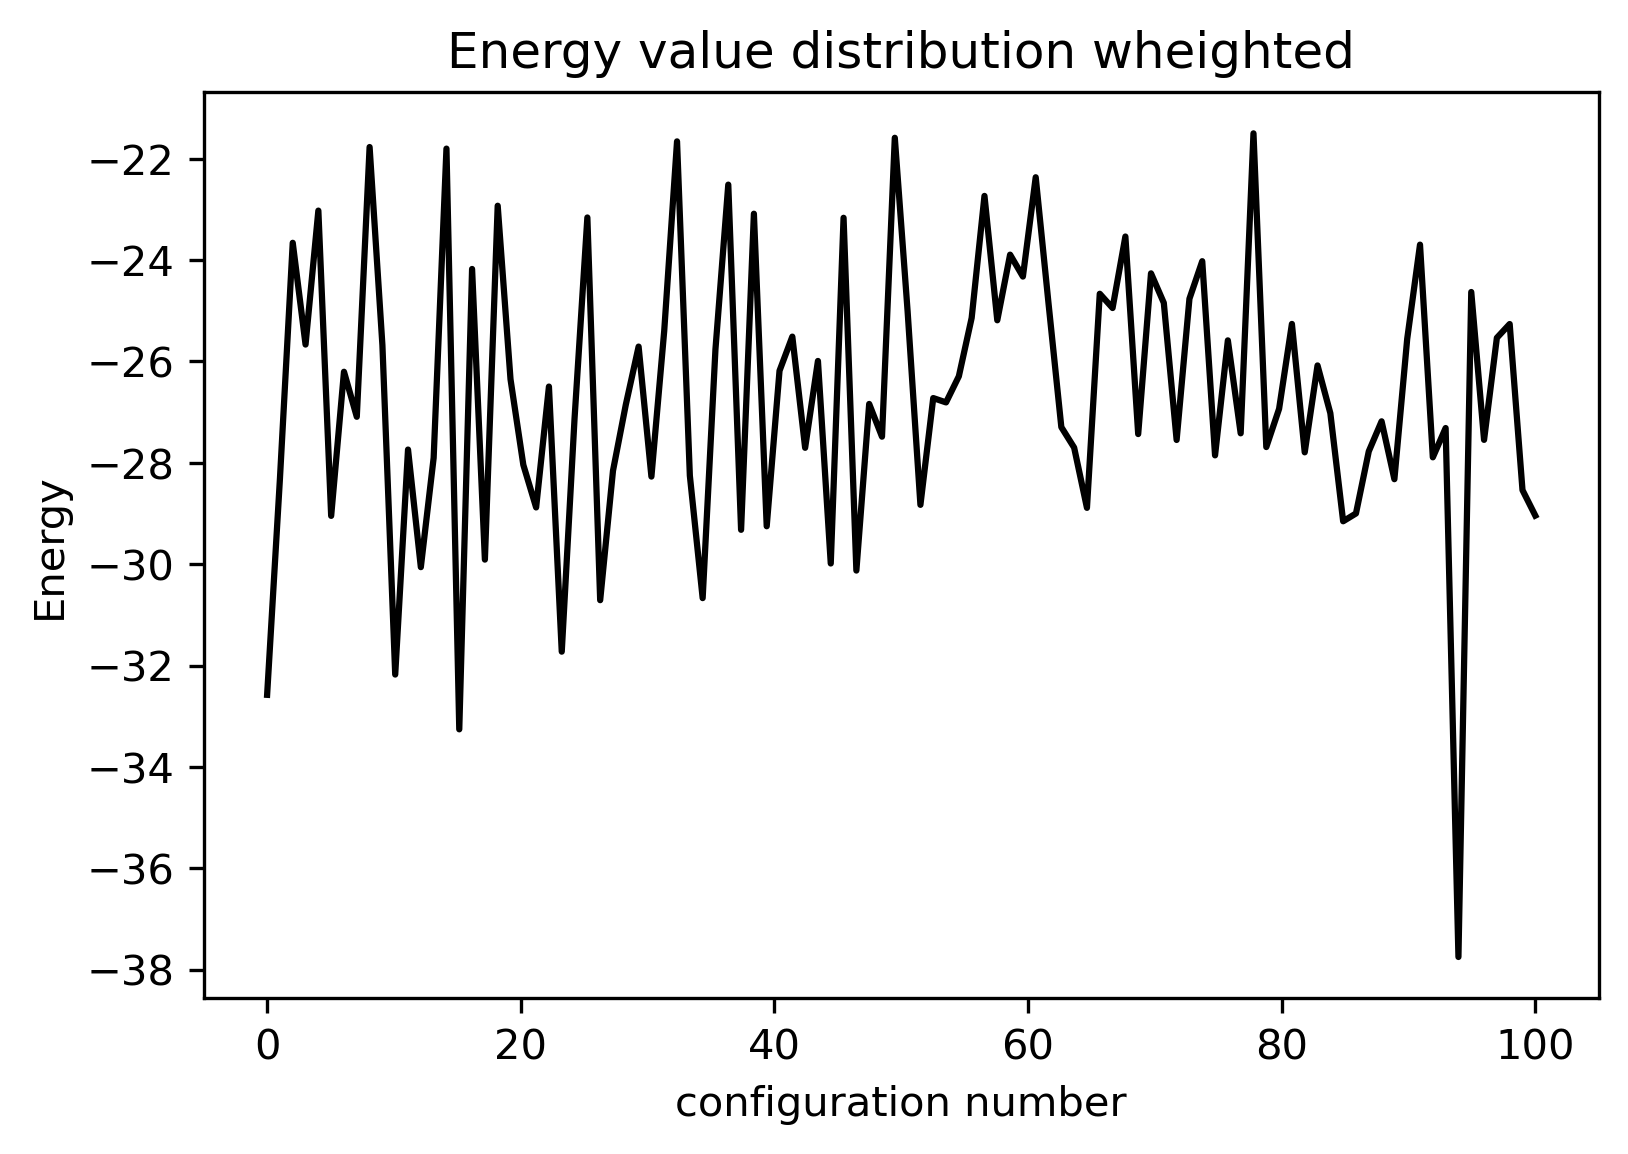

In [137]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytotwheighted),len(list_Energytotwheighted))
ax.plot(ics,list_Energytotwheighted, color='black')
ax.set_xlabel('configuration number')
ax.set_ylabel('Energy')
plt.title('Energy value distribution wheighted')
plt.show()
#print(len(ics))

In [138]:
#WOOOOOOOO
#ORA FUNZIONA QUESTO WHEIGHTED!!!
print(sum(list_Energytotwheighted)/len(list_Energytotwheighted))

#wheighted uno: -27.646005832076604 bello46
#wheighted due: -25.361241304349083 bello48

#----------
#TORNO A 400 CONFIGURATIONS E 1200 WALKER PER CONFIGURATION
#con E0=-26 la media delle energie caloclare faceva: -25.792019276976415 bello50
#con E0=-26 la media delle energie caloclare faceva: -26.13914536881365 bello52
#con E0=-26 la media delle energie caloclare faceva: -25.83377382143625 bello54

#-----------
#ho cambiato R iniziale togliendo il *10
#con E0=-26 la media delle energie caloclare faceva: -27.39581531195381 bello56
#con E0=-26 la media delle energie caloclare faceva: -27.553847714949455 bello58

#----------
#ora giro su 100 configuration e basta con 1200 walker
#con E0=-26 la media delle energie caloclare faceva: -27.600545431683937 bello60

#--------
#dopo aver aggiustato la R della funzione ratio
#con E0=-26 la media delle energie caloclare faceva: -26.725803802162297 bello62

#-------
#dopo aver aggiunto la green function a rattio
#con E0=-26 la media delle energie caloclare faceva: -26.643580720734573

-26.643580720734573


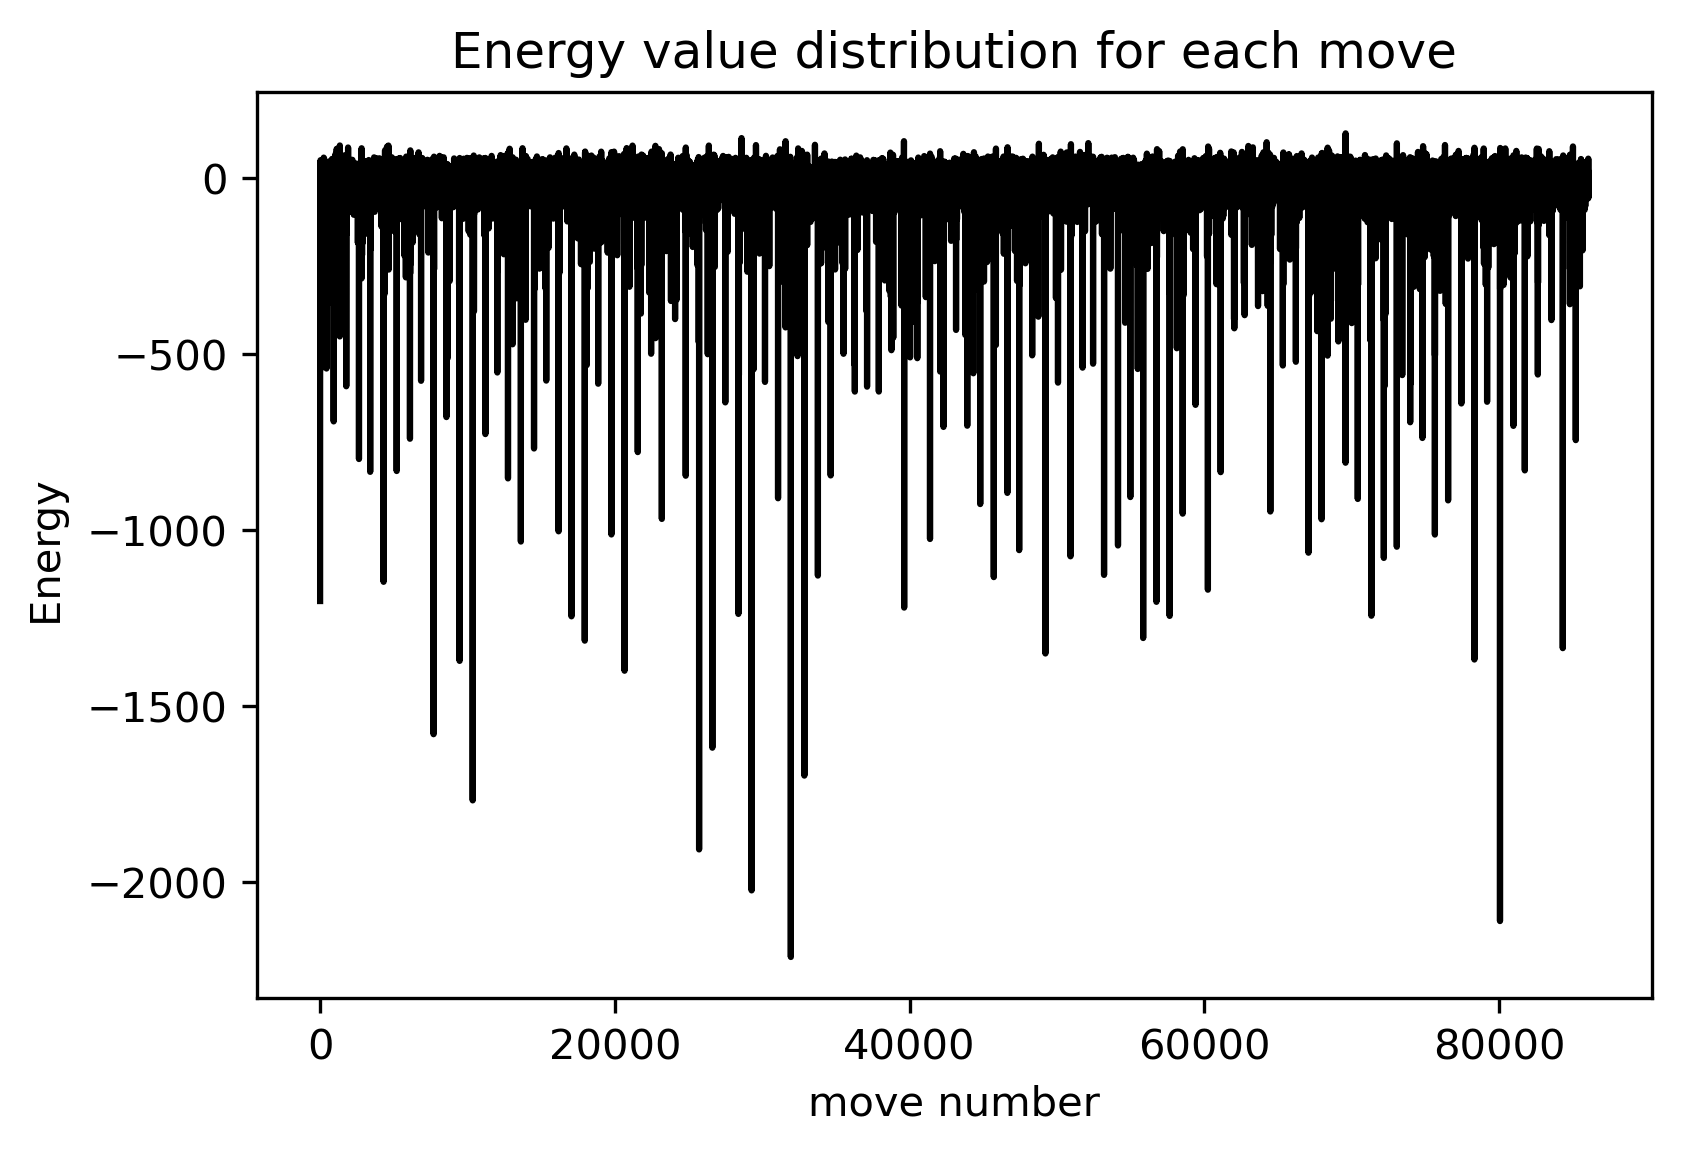

In [139]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.plot(ics,list_Energytot, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy ')
plt.title('Energy value distribution for each move')
plt.show()
#print(len(ics))

In [140]:
print(sum(list_Energytot)/len(list_Energytot))

-26.682897482975946


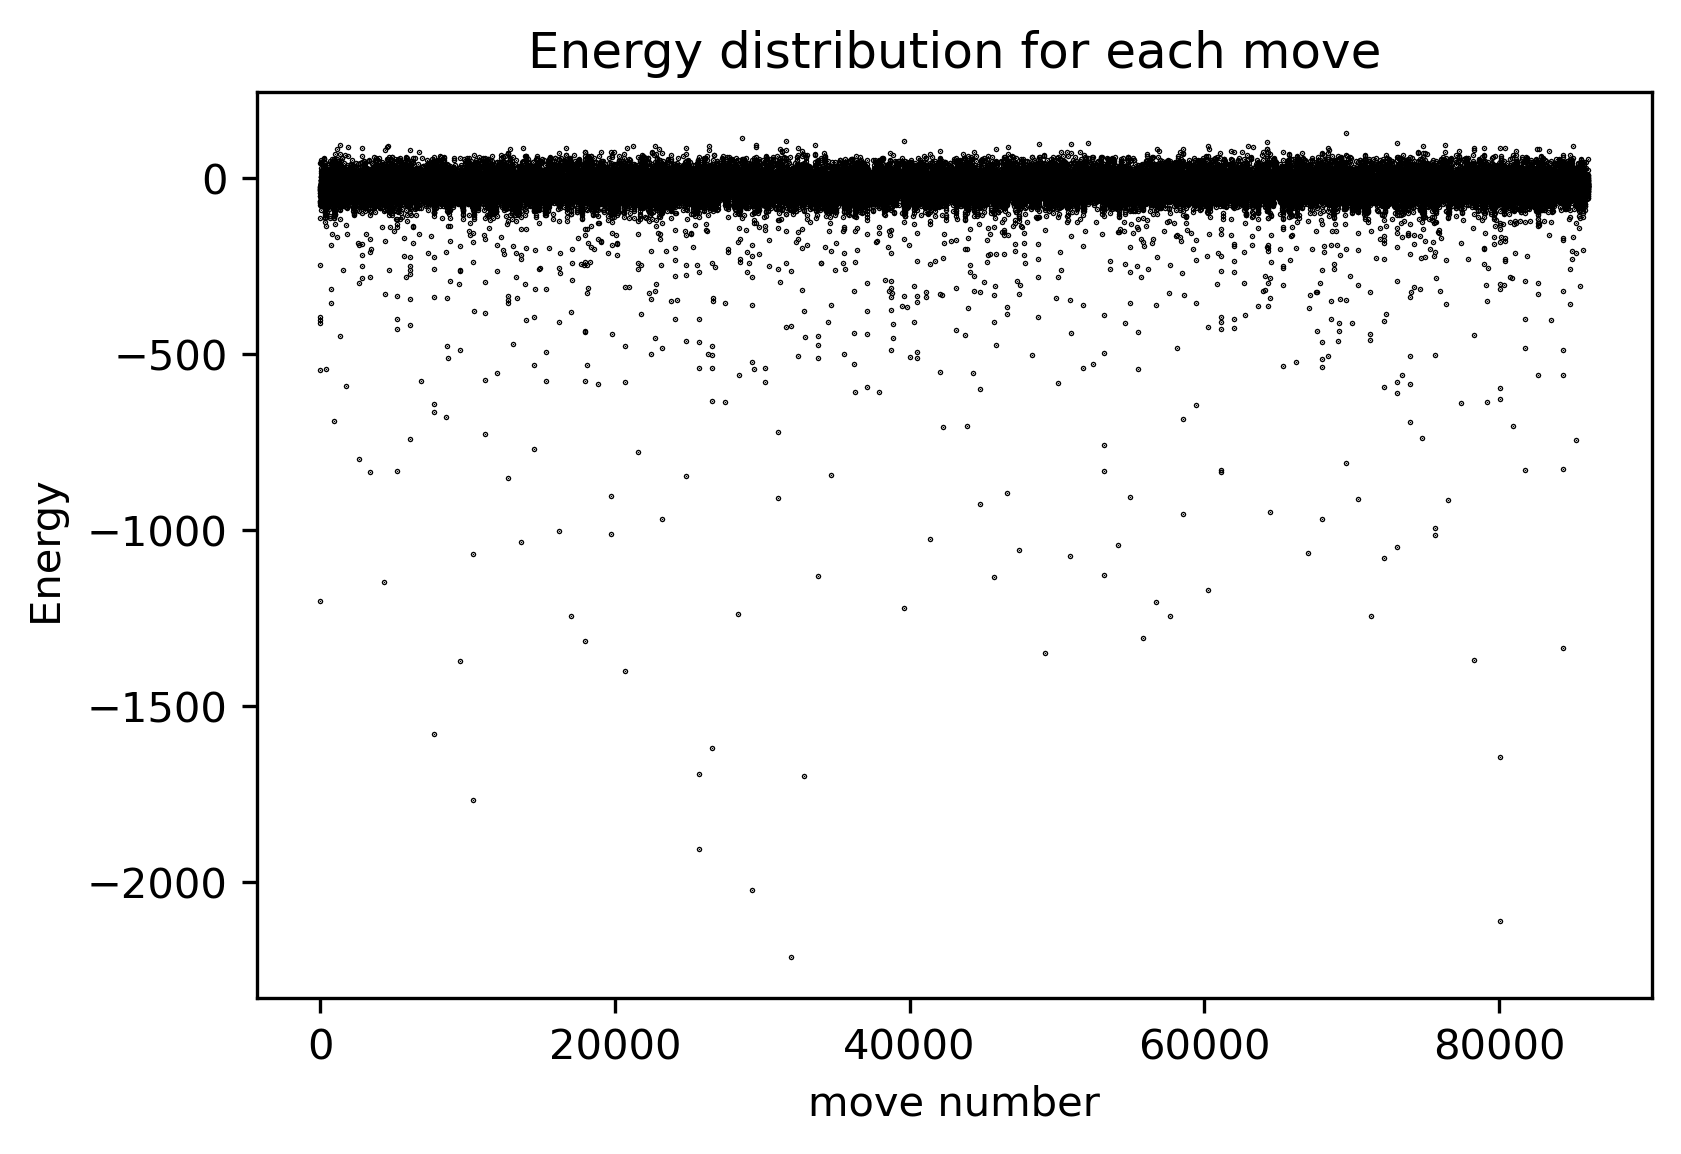

In [141]:
fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,len(list_Energytot),len(list_Energytot))
ax.scatter(ics,list_Energytot, s=0.1, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy ')
plt.title('Energy distribution for each move')
plt.show()
#print(len(ics))

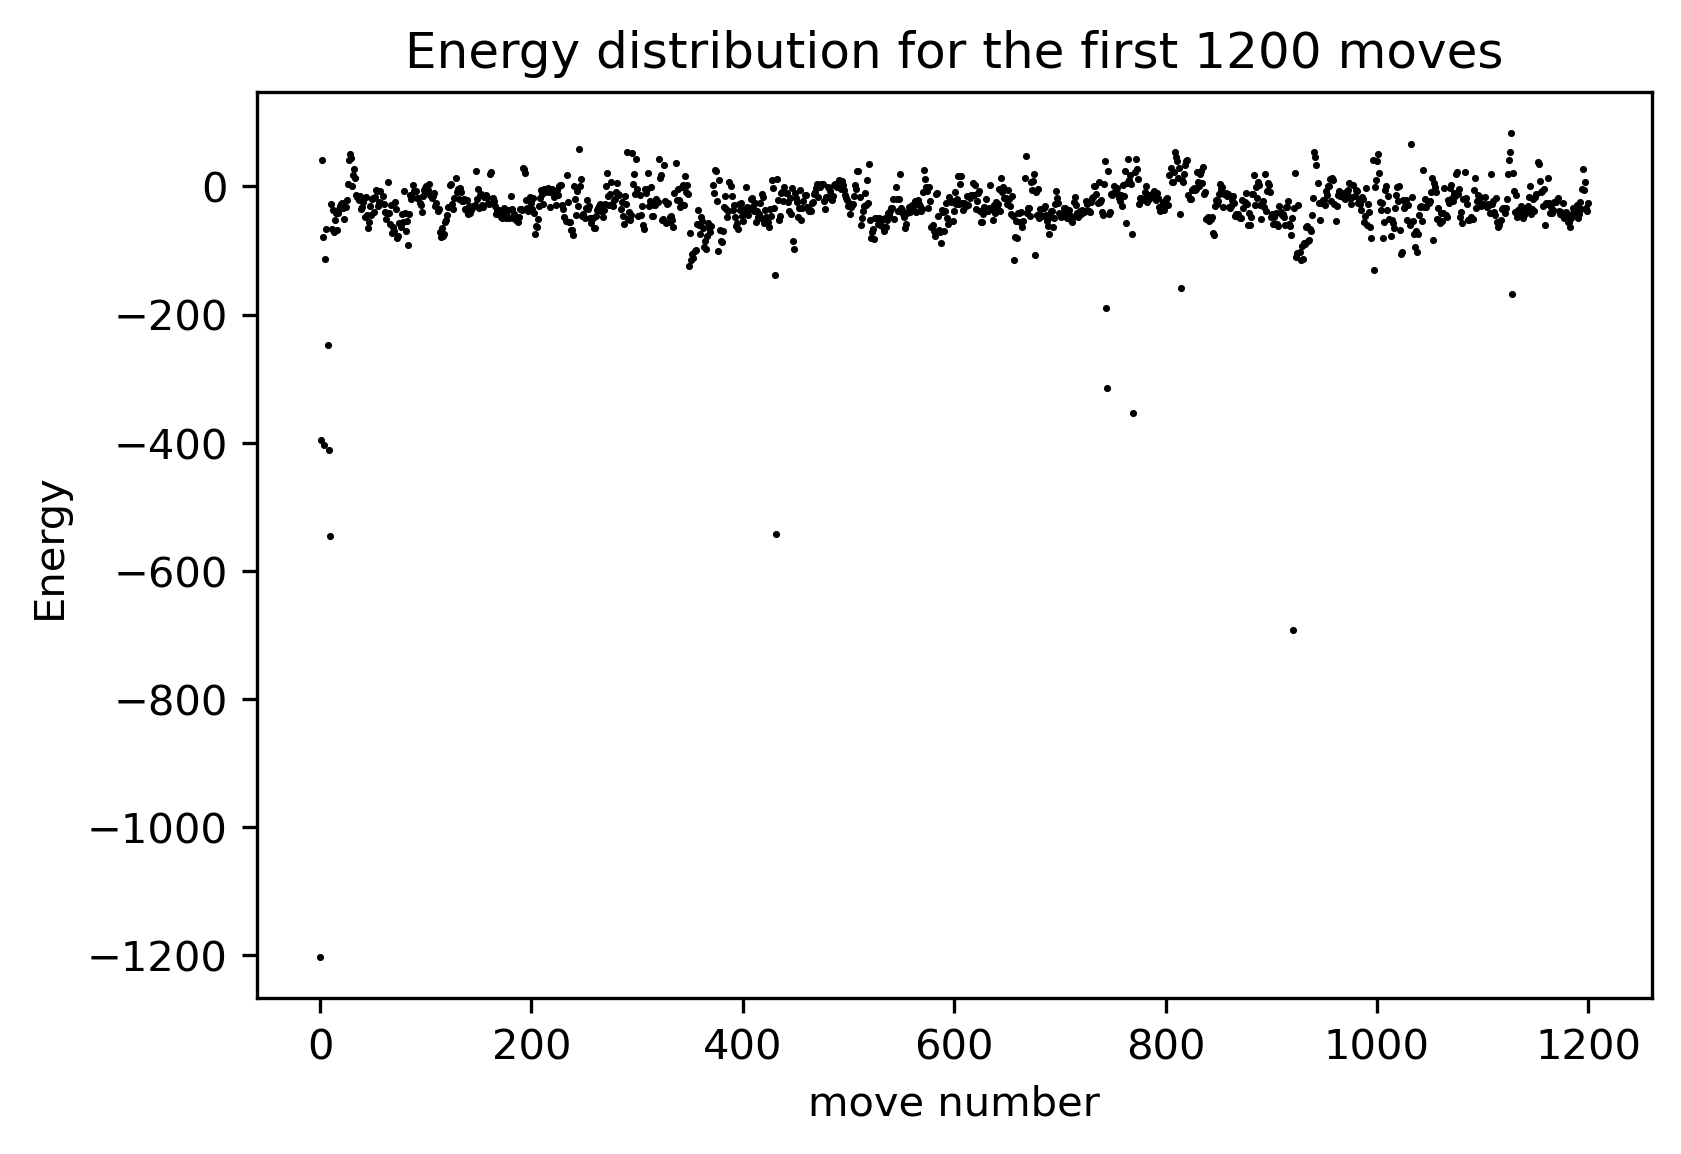

In [142]:
#STAMPA I PRIMI 1200 VALORI
#ASSOMIGLIA MOLTISSIMO A QUELLO DI GUARDIOLA.
#QUESTI SONO CIRCA DUE/TRE CONFIGURAZIONI E BASTA PERò

fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,1200,1200)
ax.scatter(ics,list_Energytot[0:1200], s=0.5, color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy')
plt.title('Energy distribution for the first 1200 moves')
plt.show()
#print(len(ics))

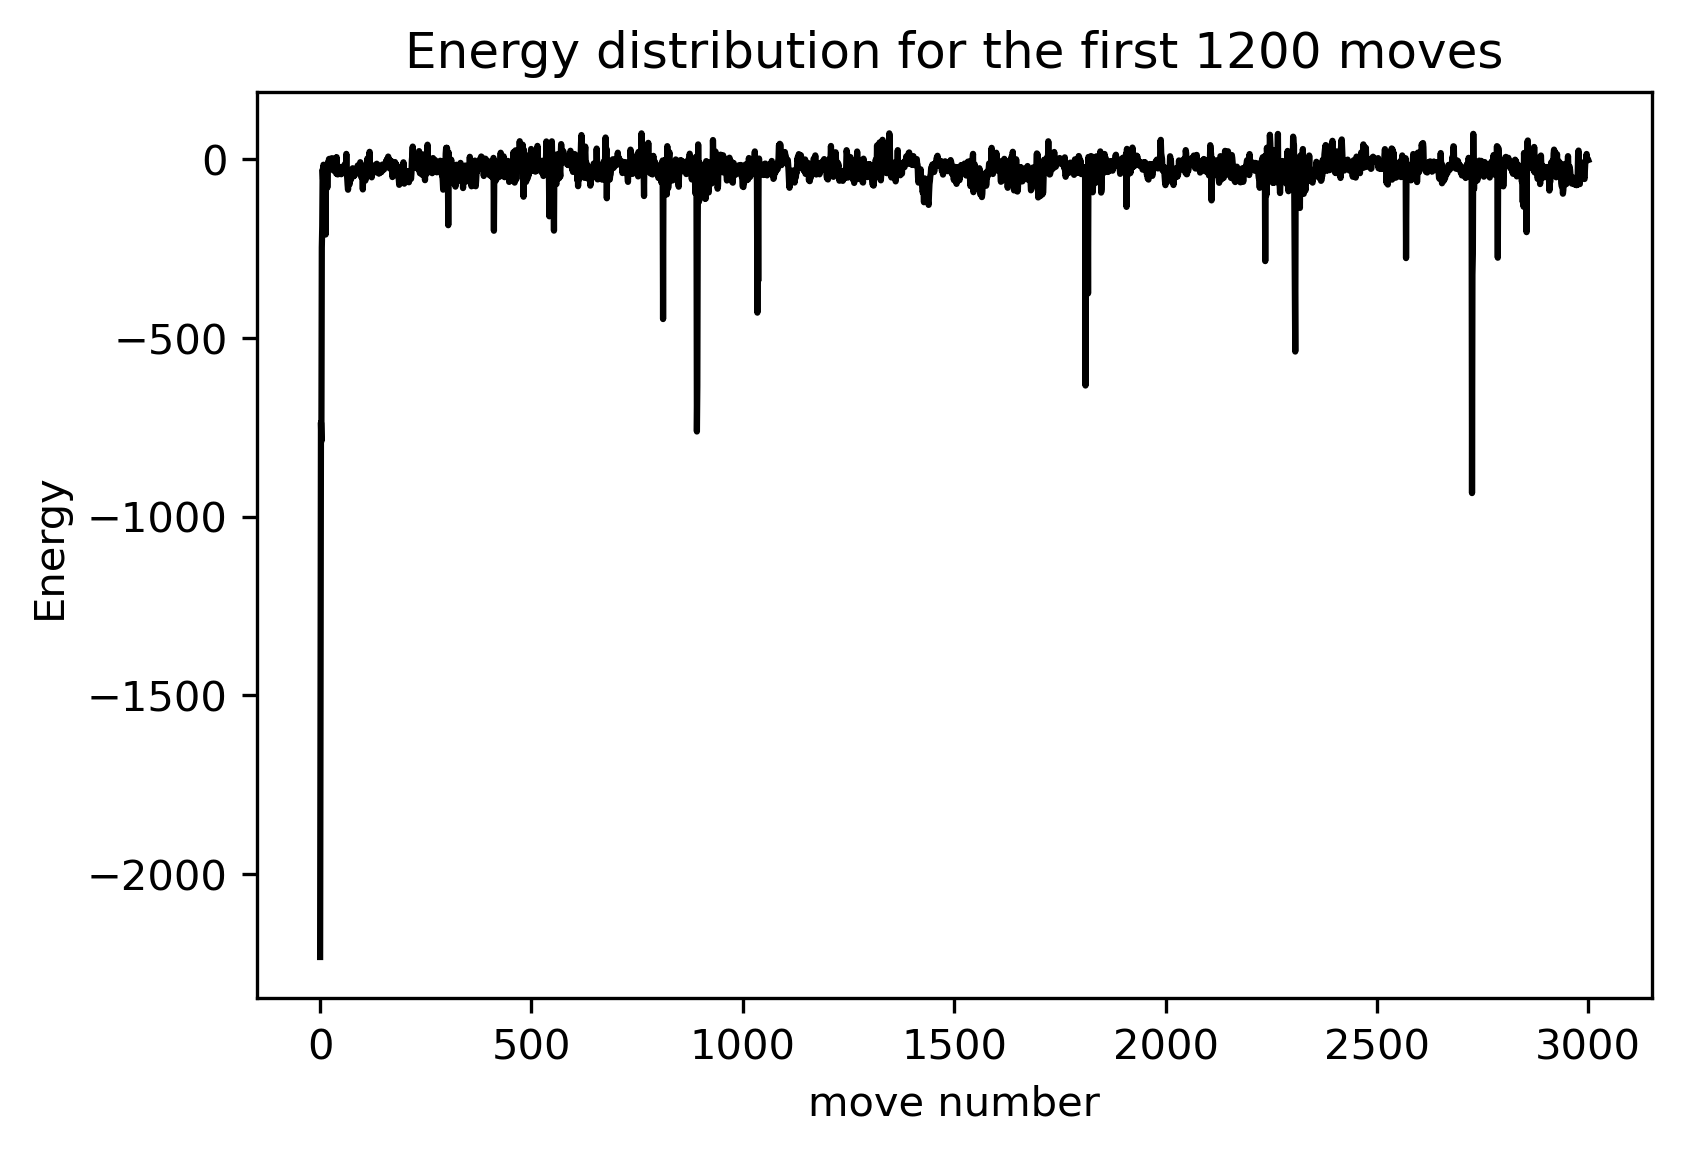

In [29]:
#STAMPA I PRIMI 1200 VALORI
#ASSOMIGLIA MOLTISSIMO A QUELLO DI GUARDIOLA.
#QUESTI SONO CIRCA DUE/TRE CONFIGURAZIONI E BASTA PERò

number=3000

fig , ax= plt.subplots(dpi=300)
ics=np.linspace(0,number,number)
ax.plot(ics,list_Energytot[0:number], color='black')
ax.set_xlabel('move number')
ax.set_ylabel('Energy')
plt.title('Energy distribution for the first 1200 moves')
plt.show()
#print(len(ics))